In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=8):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 7 * 7, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [7]:
import importlib
import functions
importlib.reload(functions)
from functions import *

In [3]:
train_dir = './data/train'
test_dir = './data/test'
batch_size = 64
num_epochs = 20
num_classes = 8
lr=0.001
save_path='best_simplecnn.pth'

train_loader, test_loader = get_data_loaders(train_dir, test_dir, batch_size=batch_size)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleCNN(num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)
best_acc = 0.0
history = {'train_loss': [], 'train_acc': [], 'test_loss': [], 'test_acc': []}

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    train_loss, train_acc = train_one_epoch(model, optimizer, criterion, train_loader, device)
    test_loss, test_acc = evaluate(model, criterion, test_loader, device)
    print(f"Train Loss: {train_loss:.4f}  Acc: {train_acc:.4f}")
    print(f"Test  Loss: {test_loss:.4f}  Acc: {test_acc:.4f}")

    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    history['test_loss'].append(test_loss)
    history['test_acc'].append(test_acc)

    if test_acc > best_acc:
        best_acc = test_acc
        torch.save(model.state_dict(), save_path)
        print("Best model saved.")

print(f"Best Test Accuracy: {best_acc:.4f}")


Epoch 1/20


Train Loss: 1.4087  Acc: 0.4503
Test  Loss: 1.0537  Acc: 0.6114
Best model saved.

Epoch 2/20


Train Loss: 0.9629  Acc: 0.6441
Test  Loss: 0.8981  Acc: 0.6703
Best model saved.

Epoch 3/20


Train Loss: 0.7863  Acc: 0.7142
Test  Loss: 0.8153  Acc: 0.7086
Best model saved.

Epoch 4/20


Train Loss: 0.6899  Acc: 0.7503
Test  Loss: 0.7234  Acc: 0.7422
Best model saved.

Epoch 5/20


Train Loss: 0.6058  Acc: 0.7828
Test  Loss: 0.7043  Acc: 0.7518
Best model saved.

Epoch 6/20


Train Loss: 0.5366  Acc: 0.8070
Test  Loss: 0.7527  Acc: 0.7364

Epoch 7/20


Train Loss: 0.4700  Acc: 0.8328
Test  Loss: 0.7113  Acc: 0.7616
Best model saved.

Epoch 8/20


Train Loss: 0.4070  Acc: 0.8548
Test  Loss: 0.7604  Acc: 0.7509

Epoch 9/20


Train Loss: 0.3477  Acc: 0.8788
Test  Loss: 0.7829  Acc: 0.7515

Epoch 10/20


Train Loss: 0.2875  Acc: 0.8996
Test  Loss: 0.8377  Acc: 0.7550

Epoch 11/20


Train Loss: 0.2364  Acc: 0.9187
Test  Loss: 0.8893  Acc: 0.7555

Epoch 12/20


Train Loss: 0.2001  Acc: 0.9310
Test  Loss: 0.9650  Acc: 0.7540

Epoch 13/20


Train Loss: 0.1618  Acc: 0.9440
Test  Loss: 1.0390  Acc: 0.7496

Epoch 14/20


Train Loss: 0.1473  Acc: 0.9475
Test  Loss: 1.1966  Acc: 0.7527

Epoch 15/20


Train Loss: 0.1193  Acc: 0.9592
Test  Loss: 1.1956  Acc: 0.7501

Epoch 16/20


Train Loss: 0.1100  Acc: 0.9616
Test  Loss: 1.4421  Acc: 0.7302

Epoch 17/20


Train Loss: 0.1032  Acc: 0.9633
Test  Loss: 1.3362  Acc: 0.7480

Epoch 18/20


Train Loss: 0.0871  Acc: 0.9695
Test  Loss: 1.4660  Acc: 0.7425

Epoch 19/20


Train Loss: 0.0750  Acc: 0.9742
Test  Loss: 1.5536  Acc: 0.7312

Epoch 20/20


Train Loss: 0.0739  Acc: 0.9744
Test  Loss: 1.5952  Acc: 0.7364
Best Test Accuracy: 0.7616


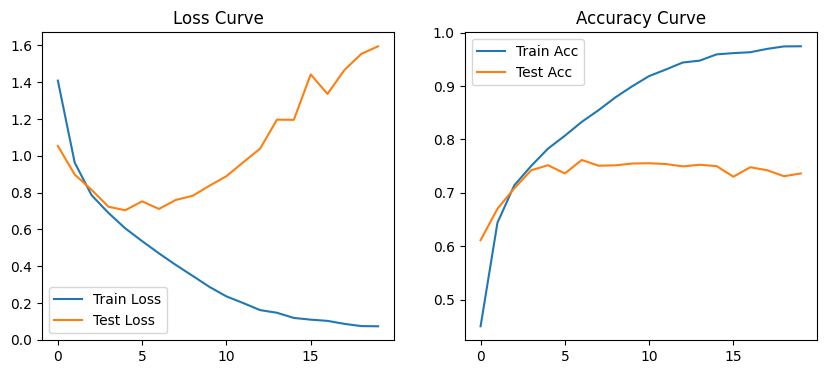

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['test_loss'], label='Test Loss')
plt.legend()
plt.title('Loss Curve')

plt.subplot(1,2,2)
plt.plot(history['train_acc'], label='Train Acc')
plt.plot(history['test_acc'], label='Test Acc')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

/tmp/ipykernel_1764/2213539080.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_simplecnn.pth', map_location=device))


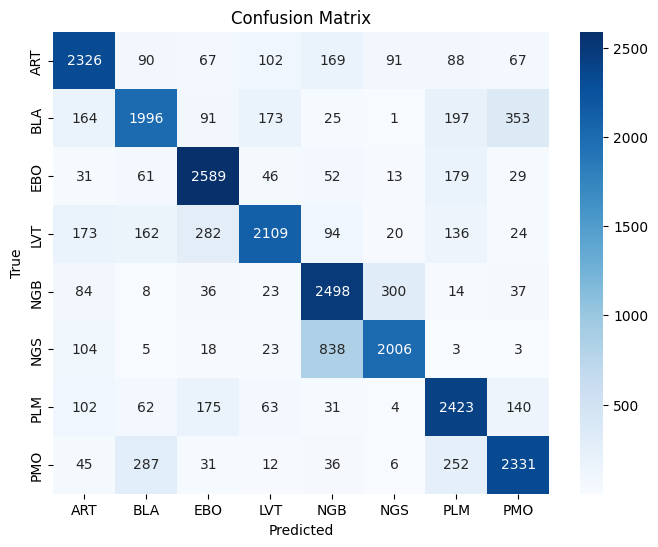


Classification Report:

              precision    recall  f1-score   support

         ART       0.77      0.78      0.77      3000
         BLA       0.75      0.67      0.70      3000
         EBO       0.79      0.86      0.82      3000
         LVT       0.83      0.70      0.76      3000
         NGB       0.67      0.83      0.74      3000
         NGS       0.82      0.67      0.74      3000
         PLM       0.74      0.81      0.77      3000
         PMO       0.78      0.78      0.78      3000

    accuracy                           0.76     24000
   macro avg       0.77      0.76      0.76     24000
weighted avg       0.77      0.76      0.76     24000



In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleCNN(num_classes=8).to(device)
model.load_state_dict(torch.load('best_simplecnn.pth', map_location=device))
class_names = ['ART', 'BLA', 'EBO', 'LVT', 'NGB', 'NGS', 'PLM', 'PMO']
plot_confusion_matrix(model, test_loader, device, class_names)